# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow import config
#from notebooks.utils import display

In [9]:
def sample_batch(dataset):
    batch = dataset.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()


def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

## 0. Parameters <a name="parameters"></a>

In [10]:
NUM_CLASSES = 10

config.set_visible_devices([], 'GPU')


## 1. Prepare the Data <a name="prepare"></a>

In [11]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [12]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

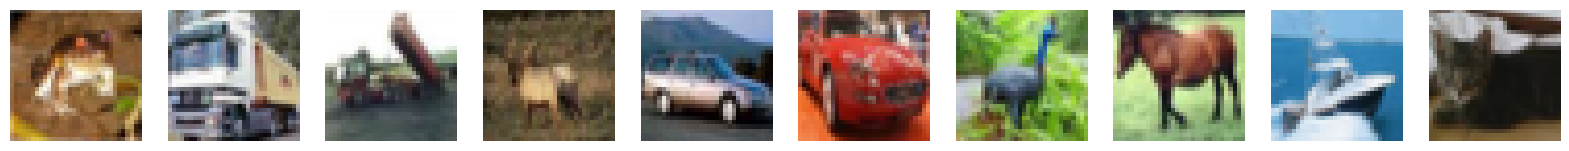

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [13]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [14]:
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
# x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)
# x = layers.Dense(50, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Train the model <a name="train"></a>

In [15]:
opt = optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [16]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8620 - accuracy: 0.3250
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6716 - accuracy: 0.4036
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5892 - accuracy: 0.4340
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5339 - accuracy: 0.4570
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4943 - accuracy: 0.4685
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4616 - accuracy: 0.4801
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4352 - accuracy: 0.4900
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4101 - accuracy: 0.4967
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3940 - accuracy: 0.5016
Epoch 10/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.376

## 4. Evaluation <a name="evaluate"></a>

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 571us/step - loss: 1.4751 - accuracy: 0.4754


[1.475077509880066, 0.47540000081062317]

In [18]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 0s 523us/step


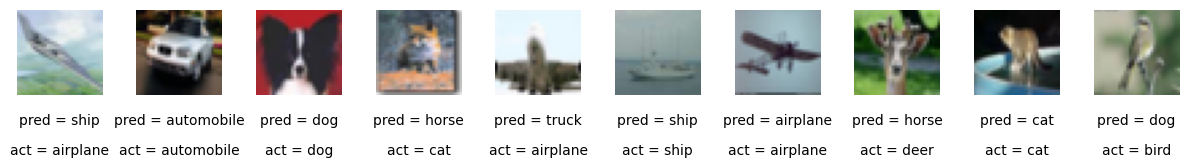

In [22]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)